In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline







In [2]:
# Load the data
df = pd.read_csv('crop_yield.csv')

# Peek at its shape and first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (19689, 10)


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
df.describe()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


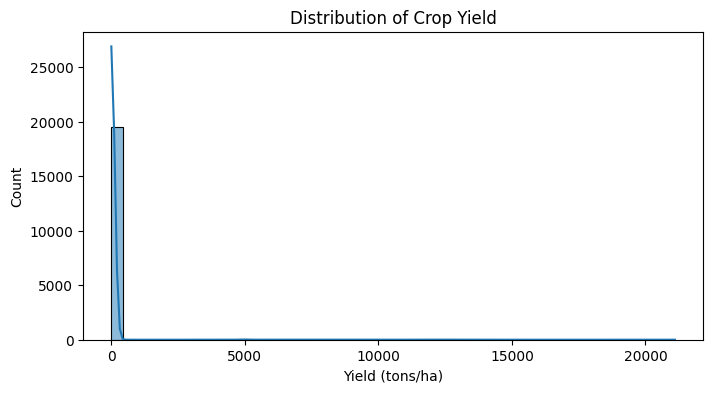

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Yield'], bins=50, kde=True)
plt.title('Distribution of Crop Yield')
plt.xlabel('Yield (tons/ha)')
plt.ylabel('Count')
plt.show()


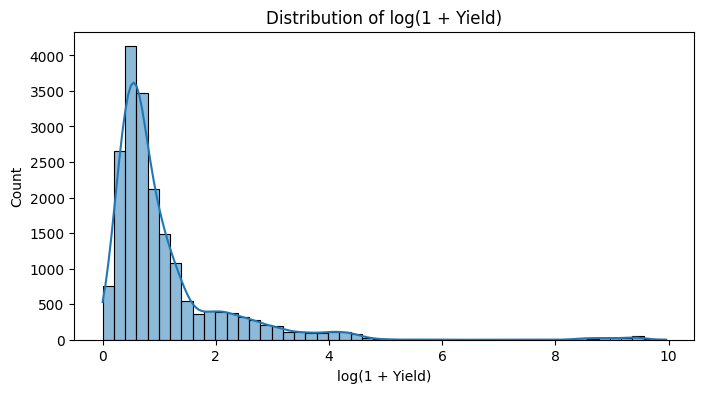

In [6]:
# Create a log(1 + Yield) column to handle zeros
df['Yield_log'] = np.log1p(df['Yield'])

# Plot the transformed distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Yield_log'], bins=50, kde=True)
plt.title('Distribution of log(1 + Yield)')
plt.xlabel('log(1 + Yield)')
plt.ylabel('Count')
plt.show()


In [7]:
# How many distinct crops, seasons, and states?
n_crops  = df['Crop'].nunique()
n_seasons = df['Season'].nunique()
n_states = df['State'].nunique()

print(f"Unique crops:  {n_crops}")
print(f"Unique seasons: {n_seasons}")
print(f"Unique states:  {n_states}")

# Peek at the top 5 most common crops
print("\nTop 5 crops by frequency:")
print(df['Crop'].value_counts().head())


Unique crops:  55
Unique seasons: 6
Unique states:  30

Top 5 crops by frequency:
Crop
Rice                 1197
Maize                 975
Moong(Green Gram)     740
Urad                  733
Groundnut             725
Name: count, dtype: int64


In [8]:
# Build a slim DataFrame for modeling
df_model = df[[
    'Crop_Year',
    'Area',
    'Annual_Rainfall',
    'Fertilizer',
    'Pesticide',
    'Yield_log',
    'Crop',
    'Season',
    'State'
]].copy()

# Peek at the first few rows
df_model.head()


,Crop_Year,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield_log,Crop,Season,State
0,1997,73814.0,2051.4,7024878.38,22882.34,0.585610,Arecanut,Whole Year,Assam
1,1997,6637.0,2051.4,631643.29,2057.47,0.536748,Arhar/Tur,Kharif,Assam
2,1997,796.0,2051.4,75755.32,246.76,0.213766,Castor seed,Kharif,Assam
3,1997,19656.0,2051.4,1870661.52,6093.36,8.563896,Coconut,Whole Year,Assam
4,1997,1739.0,2051.4,165500.63,539.09,0.351297,Cotton(lint),Kharif,Assam


In [9]:
# One‑hot encode Crop, Season, and State
df_encoded = pd.get_dummies(
    df_model,
    columns=['Crop', 'Season', 'State'],
    drop_first=True   # drop one level per variable to avoid collinearity
)

# Check the new shape
print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (19689, 94)


In [10]:
df_encoded.head()

,Crop_Year,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield_log,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,73814.0,2051.4,7024878.38,22882.34,0.585610,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,6637.0,2051.4,631643.29,2057.47,0.536748,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997,796.0,2051.4,75755.32,246.76,0.213766,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,19656.0,2051.4,1870661.52,6093.36,8.563896,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,1739.0,2051.4,165500.63,539.09,0.351297,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
!pip install scikit-learn


In [12]:
# Confirm final shape
print("Final encoded DataFrame shape:", df_encoded.shape)

# Separate features and target
X = df_encoded.drop('Yield_log', axis=1)
y = df_encoded['Yield_log']

# Split into 80% train / 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the sizes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Final encoded DataFrame shape: (19689, 94)
X_train: (15751, 93), X_test: (3938, 93)
y_train: (15751,), y_test: (3938,)


In [13]:
from sklearn.linear_model import LinearRegression

# 1. Instantiate the model
lr = LinearRegression()

# 2. Fit it on the training data
lr.fit(X_train, y_train)


LinearRegression()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Predict on X_test
y_pred = lr.predict(X_test)

# 2. Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# 3. Display the results
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²:   {r2:.4f}")


Test MSE:  0.1796
Test RMSE: 0.4237
Test R²:   0.8575


In [15]:
import pandas as pd

# Create a DataFrame of feature names and their coefficients
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coef': lr.coef_
})

# Add absolute value for sorting
coef_df['abs_coef'] = coef_df['coef'].abs()

# Show the top 10 most influential features
coef_df.sort_values('abs_coef', ascending=False).head(10)


,feature,coef,abs_coef
13,Crop_Coconut,7.676666,7.676666
50,Crop_Sugarcane,2.691096,2.691096
7,Crop_Banana,2.122858,2.122858
53,Crop_Tapioca,1.693148,1.693148
41,Crop_Potato,1.590584,1.590584
35,Crop_Onion,1.369493,1.369493
52,Crop_Sweet potato,1.258858,1.258858
25,Crop_Jute,1.092761,1.092761
10,Crop_Cardamom,-0.868969,0.868969
19,Crop_Ginger,0.856121,0.856121


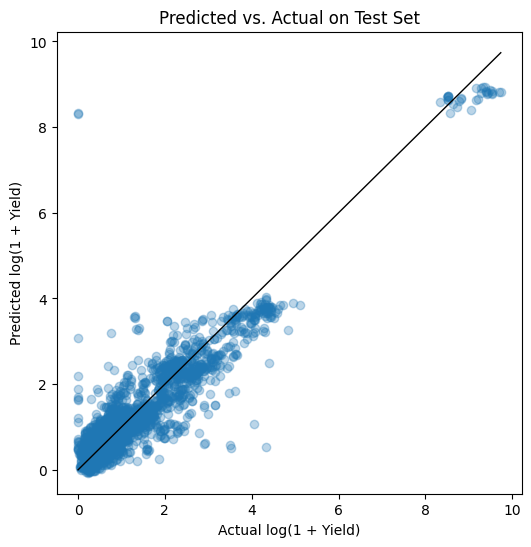

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='black', linewidth=1)
plt.xlabel('Actual log(1 + Yield)')
plt.ylabel('Predicted log(1 + Yield)')
plt.title('Predicted vs. Actual on Test Set')
plt.show()


In [17]:
# Convert log(1 + yield) → yield
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

# Evaluate in real yield units
real_mse = mean_squared_error(y_test_actual, y_pred_actual)
real_rmse = np.sqrt(real_mse)
real_r2 = r2_score(y_test_actual, y_pred_actual)

print("Real MSE:", real_mse)
print("Real RMSE:", real_rmse)
print("Real R²:", real_r2)


Real MSE: 170841.37290401294
Real RMSE: 413.3296177435304
Real R²: 0.7867787408161585
